TASK 2: [Scratch_CNN.ipynb]

* Development of a classification model for discriminating between 2 classes: masses and calcification. Design and development of an ad-hoc CNN architecture (training from scratch).

* Development of a classification model for discriminating between 2 classes: benign and malignant diagnosis. Design and development of an ad-hoc CNN architecture (training from scratch).

In [1]:
!pip install import-ipynb

  Created wheel for import-ipynb: filename=import_ipynb-0.1.3-cp36-none-any.whl size=2976 sha256=b7c1ce8cfd511af4d4b07244c47d93661f1484e7febe6807cb7b6f38bb2ad2ef
  Stored in directory: /root/.cache/pip/wheels/b4/7b/e9/a3a6e496115dffdb4e3085d0ae39ffe8a814eacc44bbf494b5
Successfully built import-ipynb


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
%cd '/content/gdrive/MyDrive/Serao_Barigliano'

/content/gdrive/MyDrive/Serao_Barigliano


In [4]:
import import_ipynb
import Utils as utils
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential

BATCH_SIZE = 64

importing Jupyter notebook from Utils.ipynb
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [5]:
images, labels, _, _ = utils.load_training()
labels = utils.divide_classes(labels, 'mass_calcification')
images = utils.normalize_dataset(images)
images, labels = utils.shuffle_dataset(images, labels)

data_augmentation = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    validation_split=0.2,
    data_format='channels_last')

images = np.expand_dims(images, axis=3) #add-channel to last

training_set = data_augmentation.flow(images, labels, batch_size=BATCH_SIZE, subset='training')
validation_set = data_augmentation.flow(images, labels, batch_size=BATCH_SIZE, subset='validation')

train_size = len(images)
validation_size = train_size*0.2
train_size -= validation_size

In [6]:
utils.properties(images[0])

Properties: 
Shape: (150, 150, 1)
Min: 0.06461642744072167
Max: 0.09245627963832073
Diff: 0.02783985219759906
Type of elements: float64


In [7]:
model = tf.keras.Sequential([
      tf.keras.layers.Conv2D(32, 5, activation='relu', input_shape=(150,150,1)),
      tf.keras.layers.MaxPool2D((4,4)),
      tf.keras.layers.Conv2D(64, 5, activation='relu'),
      tf.keras.layers.MaxPool2D((4,4)),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(512, activation='relu'),
      tf.keras.layers.Dense(256, activation='relu'),
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dense(1, activation='sigmoid')
], name='mass_calcification')

model.summary()

Model: "mass_calcification"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 146, 146, 32)      832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               2097664   
_________________________________________________________________
dense_1 (Dense)              (None, 256)        

In [8]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-3), 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

In [12]:

callbacks = [
    # model checkpoints (save the best model)
    tf.keras.callbacks.ModelCheckpoint(
        monitor='val_accuracy',
        save_best_only=True,
        mode='max',
        filepath='models/mass_calcification.h5')
]

history = model.fit(training_set,
            shuffle=True,
            steps_per_epoch=train_size // BATCH_SIZE, 
            epochs=100,
            batch_size=BATCH_SIZE,
            validation_data=validation_set,
            validation_steps=validation_size // BATCH_SIZE,
            callbacks=callbacks,
            verbose=1)

Epoch 1/100
33/33 [==============================] - 4s 136ms/step - loss: 0.4120 - accuracy: 0.8151 - val_loss: 0.4117 - val_accuracy: 0.8145
Epoch 2/100
33/33 [==============================] - 4s 137ms/step - loss: 0.4240 - accuracy: 0.8089 - val_loss: 0.4369 - val_accuracy: 0.8047
Epoch 3/100
33/33 [==============================] - 4s 134ms/step - loss: 0.4216 - accuracy: 0.8122 - val_loss: 0.4456 - val_accuracy: 0.7891
Epoch 4/100
33/33 [==============================] - 4s 135ms/step - loss: 0.4151 - accuracy: 0.8166 - val_loss: 0.4794 - val_accuracy: 0.7559
Epoch 5/100
33/33 [==============================] - 4s 133ms/step - loss: 0.4107 - accuracy: 0.8262 - val_loss: 0.4096 - val_accuracy: 0.8164
Epoch 6/100
33/33 [==============================] - 4s 134ms/step - loss: 0.4134 - accuracy: 0.8166 - val_loss: 0.5993 - val_accuracy: 0.7637
Epoch 7/100
33/33 [==============================] - 4s 134ms/step - loss: 0.4284 - accuracy: 0.8137 - val_loss: 0.4279 - val_accuracy: 0.7793

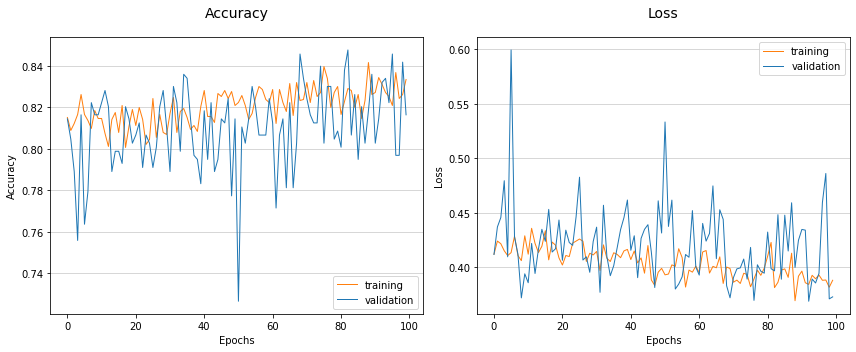

In [13]:
utils.plot_training(history.history['accuracy'], 
                    history.history['loss'], 
                    history.history['val_accuracy'], 
                    history.history['val_loss'], 
                    100,
                    'plots.png')

In [26]:
test_images, test_labels, x, y = utils.load_test()
test_labels = utils.divide_classes(test_labels, 'mass_calcification')
test_images = utils.normalize_dataset(test_images)
test_images, test_labels = utils.shuffle_dataset(test_images, test_labels)
test_images = np.expand_dims(test_images, axis=3)
utils.properties(test_images[0])

Properties: 
Shape: (150, 150, 1)
Min: 0.06547185654515733
Max: 0.11643879386239674
Diff: 0.050966937317239405
Type of elements: float64


In [30]:
model = tf.keras.models.load_model('models/mass_calcification.h5')
test_loss, test_accuracy = model.evaluate(test_images, np.array(test_labels))

11/11 [==============================] - 0s 7ms/step - loss: 0.3723 - accuracy: 0.8274
